In [24]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [25]:
dataframe = pd.read_csv("./drive/MyDrive/IEEE/Final_Data1.csv")
dataset=np.array(dataframe)
Y = dataframe["0"].values
X = dataset[:,1]

In [26]:
x = []
for i in range(len(X)):
   x = x + [pd.eval(X[i])]

In [27]:
X=np.array(x).astype('float32')

In [28]:
X=np.reshape(X,(36486,31,5,1))

In [29]:
Y=pd.get_dummies(dataframe) 

In [30]:
Y=Y.iloc[:,:8]

In [31]:
Y=np.array(Y)

In [32]:
randomize = np.arange(len(X))
np.random.shuffle(randomize)
x = X[randomize]
y = Y[randomize]

In [33]:
x_train = x[0:33000]
y_train = y[0:33000]
x_test = x[33000:]
y_test = y[33000:]
x_val = x[33000:]
y_val = y[33000:]

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau

In [36]:
model = tf.keras.models.Sequential()
                                
model.add(layers.Conv2D(256, kernel_size=5, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=5, strides=2, padding='same'))

model.add(layers.Conv2D(128, kernel_size=5, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=5, strides=2, padding='same'))

model.add(layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=3, strides=2, padding='same'))

#model.add(layers.Conv1D(32, kernel_size=2, activation='relu',padding='same'))
#model.add(layers.MaxPooling2D(pool_size=2, strides=2, padding='same'))

model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())

model.add(tf.keras.layers.Dense(8, activation="softmax"))

rlrp = ReduceLROnPlateau(monitor="loss",factor=0.4, verbose=0, patience=1, min_lr=0.0000001)
opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val), batch_size=32, callbacks=[rlrp], shuffle=True)

Epoch 1/100
1032/1032 [==============================] - 6s 5ms/step - loss: 1.7203 - accuracy: 0.3034 - val_loss: 1.5423 - val_accuracy: 0.3600 - lr: 0.0010
Epoch 2/100
1032/1032 [==============================] - 10s 9ms/step - loss: 1.4982 - accuracy: 0.4009 - val_loss: 1.3747 - val_accuracy: 0.4489 - lr: 0.0010
Epoch 3/100
1032/1032 [==============================] - 5s 5ms/step - loss: 1.3785 - accuracy: 0.4568 - val_loss: 1.2995 - val_accuracy: 0.4834 - lr: 0.0010
Epoch 4/100
1032/1032 [==============================] - 5s 5ms/step - loss: 1.3177 - accuracy: 0.4816 - val_loss: 1.2946 - val_accuracy: 0.4851 - lr: 0.0010
Epoch 5/100
1032/1032 [==============================] - 5s 5ms/step - loss: 1.2728 - accuracy: 0.4969 - val_loss: 1.2153 - val_accuracy: 0.5080 - lr: 0.0010
Epoch 6/100
1032/1032 [==============================] - 5s 5ms/step - loss: 1.2254 - accuracy: 0.5159 - val_loss: 1.2036 - val_accuracy: 0.5229 - lr: 0.0010
Epoch 7/100
1032/1032 [============================

109/109 [==============================] - 0s 4ms/step - loss: 1.2125 - accuracy: 0.6856
Accuracy of the model :  68.55995655059814 %


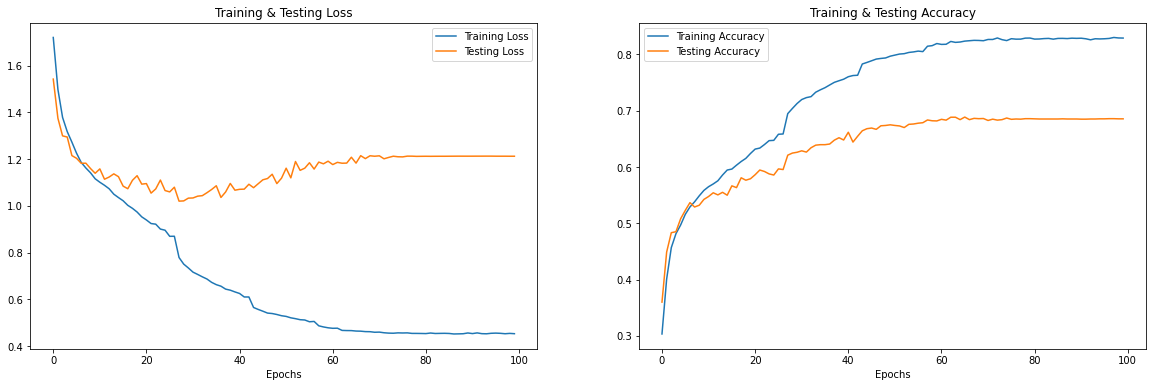

In [37]:
print("Accuracy of the model : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(100)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [38]:
model.save('./drive/MyDrive/IEEE/SER.model')

In [39]:
predictor = keras.models.load_model('./drive/MyDrive/IEEE/SER.model')

In [40]:
labels=['Angry','Calm','Disgust','Fear','Happy','Neutral','Sad','Surprised']

In [41]:
pred_test = predictor.predict(x_test)

109/109 [==============================] - 0s 2ms/step


In [42]:
actual_label = []
pred_label = []
for i in pred_test:
  pred_label.append(labels[list(i).index(max(i))])
for j in y_test:
  actual_label.append(labels[list(j).index(max(j))])
actual_label=np.array(actual_label)
pred_label=np.array(pred_label)  
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = pred_label.flatten()
df['Actual Labels'] = actual_label.flatten()
df.head(30)

,Predicted Labels,Actual Labels
0,Angry,Angry
1,Sad,Sad
2,Fear,Fear
3,Angry,Angry
4,Fear,Fear
5,Happy,Happy
6,Angry,Happy
7,Neutral,Neutral
8,Angry,Angry
9,Fear,Fear
